In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !pip install shap

!pip install shap==0.39.0

In [1]:
cd /content/drive/My Drive/特征

/content/drive/My Drive/特征


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve,cohen_kappa_score,matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
import sklearn.metrics as sm
from sklearn import  metrics
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier



In [3]:
df1 = pd.read_excel('DC重轻度2285.xlsx')
df2 = pd.read_excel('ReHo重轻度2285.xlsx')
df3 = pd.read_excel('fALFF重轻度2285.xlsx')
df4 = pd.read_excel('VMHC重轻度2285.xlsx')
df5 = pd.read_excel('DC+VMHC重轻度2285.xlsx')
df6 = pd.read_excel('Rehotest+VMHC重轻度2285.xlsx')
df7 = pd.read_excel('Rehotest+DC重轻度2285.xlsx')
df8 = pd.read_excel('Rehotest+fALFF重轻度2285.xlsx')
df9 = pd.read_excel('fALFF+DC重轻度2285.xlsx')
df10 = pd.read_excel('fALFF+VMHC重轻度2285.xlsx')
df11 = pd.read_excel('Rehotest+DC+fALFF重轻度2285.xlsx')
df12 = pd.read_excel('Rehotest+VMHC+DC重轻度2285.xlsx')
df13 = pd.read_excel('Rehotest+VMHC+fALFF重轻度2285.xlsx')
df14 = pd.read_excel('fALFF+VMHC+DC重轻度2285.xlsx')
df15 = pd.read_excel('Rehotest+DC+fALFF+VMHC重轻度2285.xlsx')

In [ ]:
df15

,ID,Precentral_L1,Precentral_R1,Frontal_Sup_L1,Frontal_Sup_R1,Frontal_Sup_Orb_L1,Frontal_Sup_Orb_R1,Frontal_Mid_L1,Frontal_Mid_R1,Frontal_Mid_Orb_L1,...,Temporal_Sup_R4,Temporal_Pole_Sup_L4,Temporal_Pole_Sup_R4,Temporal_Mid_L4,Temporal_Mid_R4,Temporal_Pole_Mid_L4,Temporal_Pole_Mid_R4,Temporal_Inf_L4,Temporal_Inf_R4,label
0,S1-1-0001,0.31495,0.28451,0.36568,0.33980,0.27855,0.30049,0.37420,0.38754,0.33706,...,0.71797,0.53017,0.51562,0.64741,0.62040,0.376090,0.292230,0.56391,0.62480,1
1,S1-1-0002,0.32150,0.30067,0.31636,0.32203,0.33164,0.27174,0.33702,0.30453,0.39003,...,0.54899,0.41991,0.39881,0.55323,0.55192,0.348210,0.284020,0.51198,0.56154,1
2,S1-1-0003,0.28421,0.30684,0.29374,0.33626,0.29885,0.27373,0.32618,0.35030,0.36171,...,0.47822,0.34310,0.31832,0.44376,0.44544,0.099954,0.090781,0.38486,0.43882,1
3,S1-1-0004,0.29494,0.27908,0.32904,0.30494,0.33379,0.26707,0.30701,0.35131,0.35249,...,0.26706,0.36492,0.34468,0.23686,0.25213,0.366260,0.252560,0.22597,0.28877,1
4,S1-1-0005,0.30352,0.32043,0.33104,0.32205,0.31467,0.29820,0.33572,0.34814,0.38910,...,0.59875,0.46322,0.43516,0.61224,0.59269,0.481020,0.396450,0.53864,0.57610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,S25-2-0059,0.29059,0.31291,0.33967,0.34186,0.31451,0.35769,0.35754,0.36215,0.38104,...,0.74991,0.53915,0.54411,0.58731,0.53815,0.484450,0.337660,0.40842,0.43906,0
2281,S25-2-0060,0.25920,0.26688,0.36571,0.35444,0.39548,0.35049,0.36980,0.39848,0.42792,...,0.32592,0.16233,0.16822,0.30506,0.30437,0.089899,0.108280,0.28118,0.32990,0
2282,S25-2-0061,0.22930,0.26453,0.25684,0.26631,0.26575,0.24786,0.25150,0.25881,0.27377,...,0.41780,0.33199,0.28664,0.34428,0.33529,0.175840,0.133310,0.17219,0.20349,0
2283,S25-2-0062,0.37064,0.39217,0.32709,0.35334,0.33545,0.33273,0.34880,0.33197,0.33881,...,0.44208,0.45426,0.44807,0.54011,0.52062,0.299740,0.233030,0.44878,0.48258,0


In [ ]:
df15.label.value_counts()

1    1157
0    1128
Name: label, dtype: int64

In [4]:
df1 = df1.drop('ID', axis=1)
df2 = df2.drop('ID', axis=1)
df3 = df3.drop('ID', axis=1)
df4 = df4.drop('ID', axis=1)
df5 = df5.drop('ID', axis=1)
df6 = df6.drop('ID', axis=1)
df7 = df7.drop('ID', axis=1)
df8 = df8.drop('ID', axis=1)
df9 = df9.drop('ID', axis=1)
df10 = df10.drop('ID', axis=1)
df11 = df11.drop('ID', axis=1)
df12 = df12.drop('ID', axis=1)
df13 = df13.drop('ID', axis=1)
df14 = df14.drop('ID', axis=1)
df15 = df15.drop('ID', axis=1)

In [5]:
X1 = df1.drop('label', axis=1)
y1 = df1['label']
X2 = df2.drop('label', axis=1)
y2 = df2['label']
X3 = df3.drop('label', axis=1)
y3 = df3['label']
X4 = df4.drop('label', axis=1)
y4 = df4['label']
X5 = df5.drop('label', axis=1)
y5 = df5['label']
X6 = df6.drop('label', axis=1)
y6 = df6['label']
X7 = df7.drop('label', axis=1)
y7 = df7['label']
X8 = df8.drop('label', axis=1)
y8 = df8['label']
X9 = df9.drop('label', axis=1)
y9 = df9['label']
X10 = df10.drop('label', axis=1)
y10 = df10['label']
X11 = df11.drop('label', axis=1)
y11 = df11['label']
X12 = df12.drop('label', axis=1)
y12 = df12['label']
X13 = df13.drop('label', axis=1)
y13 = df13['label']
X14 = df14.drop('label', axis=1)
y14 = df14['label']
X15 = df15.drop('label', axis=1)
y15 = df15['label']

In [ ]:
from pycaret.classification import *
# clf1 = setup(df1, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf2 = setup(df2, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf3 = setup(df3, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf4 = setup(df4, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf5 = setup(df5, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf6 = setup(df6, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf7 = setup(df7, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf8 = setup(df8, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf9 = setup(df8, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf10 = setup(df10, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf11 = setup(df11, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf12 = setup(df12, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf13 = setup(df13, target = 'label', train_size = 0.8,normalize = True,session_id=1)
# clf14 = setup(df14, target = 'label', train_size = 0.8,normalize = True,session_id=1)
clf15 = setup(df15, target = 'label', train_size = 0.8,normalize = True,session_id=1)

,Description,Value
0,Session id,1
1,Target,label
2,Target type,Binary
3,Original data shape,"(2285, 361)"
4,Transformed data shape,"(2285, 361)"
5,Transformed train set shape,"(1828, 361)"
6,Transformed test set shape,"(457, 361)"
7,Numeric features,360
8,Preprocess,True
9,Imputation type,simple


In [ ]:
add_metric('specificity', 'specificity', specificity_score, greater_is_better = True)
add_metric('sensitivity', 'sensitivity', sensitivity_score, greater_is_better = True)
add_metric('Gmean', 'Gmean', geometric_mean_score, greater_is_better = True)

Name                                                             Gmean
Display Name                                                     Gmean
Score Function       <function geometric_mean_score at 0x7ae65fa48820>
Scorer                               make_scorer(geometric_mean_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: Gmean, dtype: object

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.8197,0.9008,0.6957,0.9275,0.7950,0.6398,0.6610,0.9451,0.6957,0.8108
1,0.8634,0.9240,0.8043,0.9136,0.8555,0.7269,0.7323,0.9231,0.8043,0.8617
2,0.7978,0.8849,0.6344,0.9516,0.7613,0.5978,0.6349,0.9667,0.6344,0.7831
3,0.8306,0.9209,0.6667,1.0000,0.8000,0.6630,0.7042,1.0000,0.6667,0.8165
4,0.8033,0.9121,0.6452,0.9524,0.7692,0.6086,0.6438,0.9667,0.6452,0.7897
5,0.8033,0.9042,0.6237,0.9831,0.7632,0.6088,0.6552,0.9889,0.6237,0.7853
6,0.7923,0.9047,0.6344,0.9365,0.7564,0.5868,0.6208,0.9556,0.6344,0.7786
7,0.7869,0.8778,0.5806,1.0000,0.7347,0.5766,0.6365,1.0000,0.5806,0.7620
8,0.8077,0.9074,0.6522,0.9524,0.7742,0.6167,0.6504,0.9667,0.6522,0.7940


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuneknn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.8033,0.8723,0.7065,0.8784,0.7831,0.6070,0.6190,0.9011,0.7065,0.7979
1,0.8689,0.9031,0.8478,0.8864,0.8667,0.7378,0.7385,0.8901,0.8478,0.8687
2,0.7923,0.8303,0.6989,0.8667,0.7738,0.5859,0.5975,0.8889,0.6989,0.7882
3,0.8306,0.9077,0.7634,0.8875,0.8208,0.6619,0.6687,0.9000,0.7634,0.8289
4,0.8142,0.8729,0.6882,0.9275,0.7901,0.6299,0.6526,0.9444,0.6882,0.8062
5,0.8525,0.8993,0.7527,0.9459,0.8383,0.7058,0.7215,0.9556,0.7527,0.8481
6,0.8361,0.8916,0.7204,0.9437,0.8171,0.6733,0.6935,0.9556,0.7204,0.8297
7,0.7869,0.8481,0.6559,0.8971,0.7578,0.5756,0.5981,0.9222,0.6559,0.7778
8,0.8132,0.8661,0.7283,0.8816,0.7976,0.6270,0.6369,0.9000,0.7283,0.8096


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.8634,0.9330,0.9783,0.7965,0.8780,0.7264,0.7464,0.7473,0.9783,0.8550
1,0.8525,0.9212,0.9783,0.7826,0.8696,0.7045,0.7279,0.7253,0.9783,0.8423
2,0.8798,0.9531,0.9892,0.8142,0.8932,0.7586,0.7776,0.7667,0.9892,0.8709
3,0.8743,0.9017,0.9785,0.8125,0.8878,0.7477,0.7645,0.7667,0.9785,0.8661
4,0.8689,0.9197,0.9677,0.8108,0.8824,0.7368,0.7516,0.7667,0.9677,0.8614
5,0.8415,0.8881,0.9462,0.7857,0.8585,0.6819,0.6972,0.7333,0.9462,0.8330
6,0.9290,0.9523,0.9892,0.8846,0.9340,0.8576,0.8639,0.8667,0.9892,0.9259
7,0.8962,0.9714,1.0000,0.8304,0.9073,0.7916,0.8094,0.7889,1.0000,0.8882
8,0.8462,0.9121,0.9674,0.7807,0.8641,0.6915,0.7127,0.7222,0.9674,0.8359


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuneqda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.9508,0.9639,0.9565,0.9462,0.9514,0.9016,0.9017,0.9451,0.9565,0.9508
1,0.9617,0.9849,0.9457,0.9775,0.9613,0.9235,0.9240,0.9780,0.9457,0.9617
2,0.9727,0.9918,0.9677,0.9783,0.9730,0.9454,0.9454,0.9778,0.9677,0.9727
3,0.9672,0.9744,0.9677,0.9677,0.9677,0.9344,0.9344,0.9667,0.9677,0.9672
4,0.9672,0.9787,0.9570,0.9780,0.9674,0.9344,0.9347,0.9778,0.9570,0.9673
5,0.9399,0.9527,0.8925,0.9881,0.9379,0.8799,0.8842,0.9889,0.8925,0.9394
6,0.9672,0.9901,0.9570,0.9780,0.9674,0.9344,0.9347,0.9778,0.9570,0.9673
7,0.9672,0.9816,0.9570,0.9780,0.9674,0.9344,0.9347,0.9778,0.9570,0.9673
8,0.9505,0.9772,0.9565,0.9462,0.9514,0.9011,0.9011,0.9444,0.9565,0.9505


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.8197,0.9199,0.7609,0.8642,0.8092,0.6396,0.6442,0.8791,0.7609,0.8179
1,0.8962,0.9537,0.8913,0.9011,0.8962,0.7924,0.7924,0.9011,0.8913,0.8962
2,0.8743,0.9372,0.8280,0.9167,0.8701,0.7490,0.7526,0.9222,0.8280,0.8738
3,0.8798,0.9467,0.8065,0.9494,0.8721,0.7601,0.7691,0.9556,0.8065,0.8778
4,0.9016,0.9446,0.8387,0.9630,0.8966,0.8036,0.8106,0.9667,0.8387,0.9004
5,0.8142,0.9292,0.7419,0.8734,0.8023,0.6292,0.6367,0.8889,0.7419,0.8121
6,0.8743,0.9620,0.8280,0.9167,0.8701,0.7490,0.7526,0.9222,0.8280,0.8738
7,0.8415,0.9381,0.7419,0.9324,0.8263,0.6841,0.6992,0.9444,0.7419,0.8371
8,0.8681,0.9472,0.8261,0.9048,0.8636,0.7365,0.7393,0.9111,0.8261,0.8676


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
stacker_xgb = stack_models(estimator_list = [qda, knn],meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.9235,0.9772,0.9022,0.9432,0.9222,0.8470,0.8478,0.9451,0.9022,0.9234
1,0.9399,0.9798,0.9457,0.9355,0.9405,0.8798,0.8798,0.9341,0.9457,0.9398
2,0.9071,0.9808,0.9032,0.9130,0.9081,0.8142,0.8142,0.9111,0.9032,0.9072
3,0.9235,0.9835,0.9032,0.9438,0.9231,0.8471,0.8479,0.9444,0.9032,0.9236
4,0.9290,0.9836,0.8925,0.9651,0.9274,0.8581,0.8606,0.9667,0.8925,0.9288
5,0.9235,0.9737,0.8817,0.9647,0.9213,0.8472,0.8504,0.9667,0.8817,0.9232
6,0.9508,0.9894,0.9462,0.9565,0.9514,0.9016,0.9017,0.9556,0.9462,0.9509
7,0.9180,0.9885,0.8710,0.9643,0.9153,0.8363,0.8403,0.9667,0.8710,0.9176
8,0.9231,0.9812,0.9239,0.9239,0.9239,0.8461,0.8461,0.9222,0.9239,0.9231


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker_tunexgb = stack_models(estimator_list = [tuneknn, tuneqda],meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,specificity,sensitivity,Gmean
Fold,,,,,,,,,,
0,0.9563,0.9910,0.9783,0.9375,0.9574,0.9125,0.9134,0.9341,0.9783,0.9559
1,0.9672,0.9903,0.9457,0.9886,0.9667,0.9344,0.9353,0.9890,0.9457,0.9671
2,0.9836,0.9986,0.9677,1.0000,0.9836,0.9672,0.9677,1.0000,0.9677,0.9837
3,0.9836,0.9965,0.9677,1.0000,0.9836,0.9672,0.9677,1.0000,0.9677,0.9837
4,0.9727,0.9965,0.9570,0.9889,0.9727,0.9454,0.9459,0.9889,0.9570,0.9728
5,0.9454,0.9901,0.9032,0.9882,0.9438,0.8908,0.8943,0.9889,0.9032,0.9451
6,0.9672,0.9963,0.9677,0.9677,0.9677,0.9344,0.9344,0.9667,0.9677,0.9672
7,0.9836,0.9994,0.9677,1.0000,0.9836,0.9672,0.9677,1.0000,0.9677,0.9837
8,0.9615,0.9946,0.9565,0.9670,0.9617,0.9231,0.9231,0.9667,0.9565,0.9616


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
std = StandardScaler()
X1 = std.fit_transform(X1)
X2 = std.fit_transform(X2)
X3 = std.fit_transform(X3)
X4 = std.fit_transform(X4)
X5 = std.fit_transform(X5)
X6 = std.fit_transform(X6)
X7 = std.fit_transform(X7)
X8 = std.fit_transform(X8)
X9 = std.fit_transform(X9)
X10 = std.fit_transform(X10)
X11 = std.fit_transform(X11)
X12 = std.fit_transform(X12)
X13 = std.fit_transform(X13)
X14 = std.fit_transform(X14)
X15 = std.fit_transform(X15)


In [7]:
# 数据集划分
# split data train 80 % and test 20 %

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=35)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=35)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=35)
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=35)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=35)
x_train6, x_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=35)
x_train7, x_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=35)
x_train8, x_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=35)
x_train9, x_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=35)
x_train10, x_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.2, random_state=35)
x_train11, x_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=35)
x_train12, x_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.2, random_state=35)
x_train13, x_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.2, random_state=35)
x_train14, x_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.2, random_state=35)
x_train15, x_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.2, random_state=35)

In [ ]:
#knn

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train15, y_train15)
knn_y_pre=knn.predict(x_test15)
knn_y_proba=knn.predict_proba(x_test15)

In [ ]:
knn_accuracy_score=accuracy_score(y_test15,knn_y_pre)
print(knn_accuracy_score)

0.8227571115973742


In [8]:
# Xgbc
Xgbc=XGBClassifier(random_state=2018,n_estimators = 1000,max_depth = 3,scale_pos_weight = 10)
Xgbc.fit(x_train15,y_train15)
Xgbc_y_pre=Xgbc.predict(x_test15)

In [9]:
Xgbc_accuracy_score=accuracy_score(y_test15,Xgbc_y_pre)
Xgbc_accuracy_score

0.8708971553610503

In [10]:
Xgbc_preci_score=precision_score(y_test15,Xgbc_y_pre)
Xgbc_recall_score=recall_score(y_test15,Xgbc_y_pre)
Xgbc_f1_score=f1_score(y_test15,Xgbc_y_pre)
Xgbc_auc=roc_auc_score(y_test15,Xgbc_y_pre)
print('Xgbc_accuracy_score: %f,Xgbc_preci_score: %f,Xgbc_recall_score: %f,Xgbc_f1_score: %f,Xgbc_auc: %f'
      %(Xgbc_accuracy_score,Xgbc_preci_score,Xgbc_recall_score,Xgbc_f1_score,Xgbc_auc))

Xgbc_accuracy_score: 0.870897,Xgbc_preci_score: 0.871795,Xgbc_recall_score: 0.875536,Xgbc_f1_score: 0.873662,Xgbc_auc: 0.870804


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train15,y_train15)
qda_y_pre=qda.predict(x_test15)
qda_y_proba=qda.predict_proba(x_test15)

In [ ]:
qda_accuracy_score=accuracy_score(y_test15,qda_y_pre)
qda_accuracy_score

0.8840262582056893

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('knn', KNeighborsClassifier(n_neighbors=5)),('qda',  QuadraticDiscriminantAnalysis()) ]
clf = StackingClassifier(estimators=estimators, final_estimator=Xgbc)
clf.fit(x_train15,y_train15)
clf_y_pre=clf.predict(x_test15)
clf_y_proba=clf.predict_proba(x_test15)

In [ ]:
# clf模型评分：准确率
clf_accuracy_score=accuracy_score(y_test15,clf_y_pre)
clf_accuracy_score

0.8971553610503282

In [ ]:
knn_y_proba = knn.predict_proba(x_test15)[:,1]
qda_y_proba = qda.predict_proba(x_test15)[:,1]
xgb_y_proba = Xgbc.predict_proba(x_test15)[:,1]
clf_y_proba = clf.predict_proba(x_test15)[:,1]

In [ ]:
y_a = np.array(y_test15,dtype='float64')

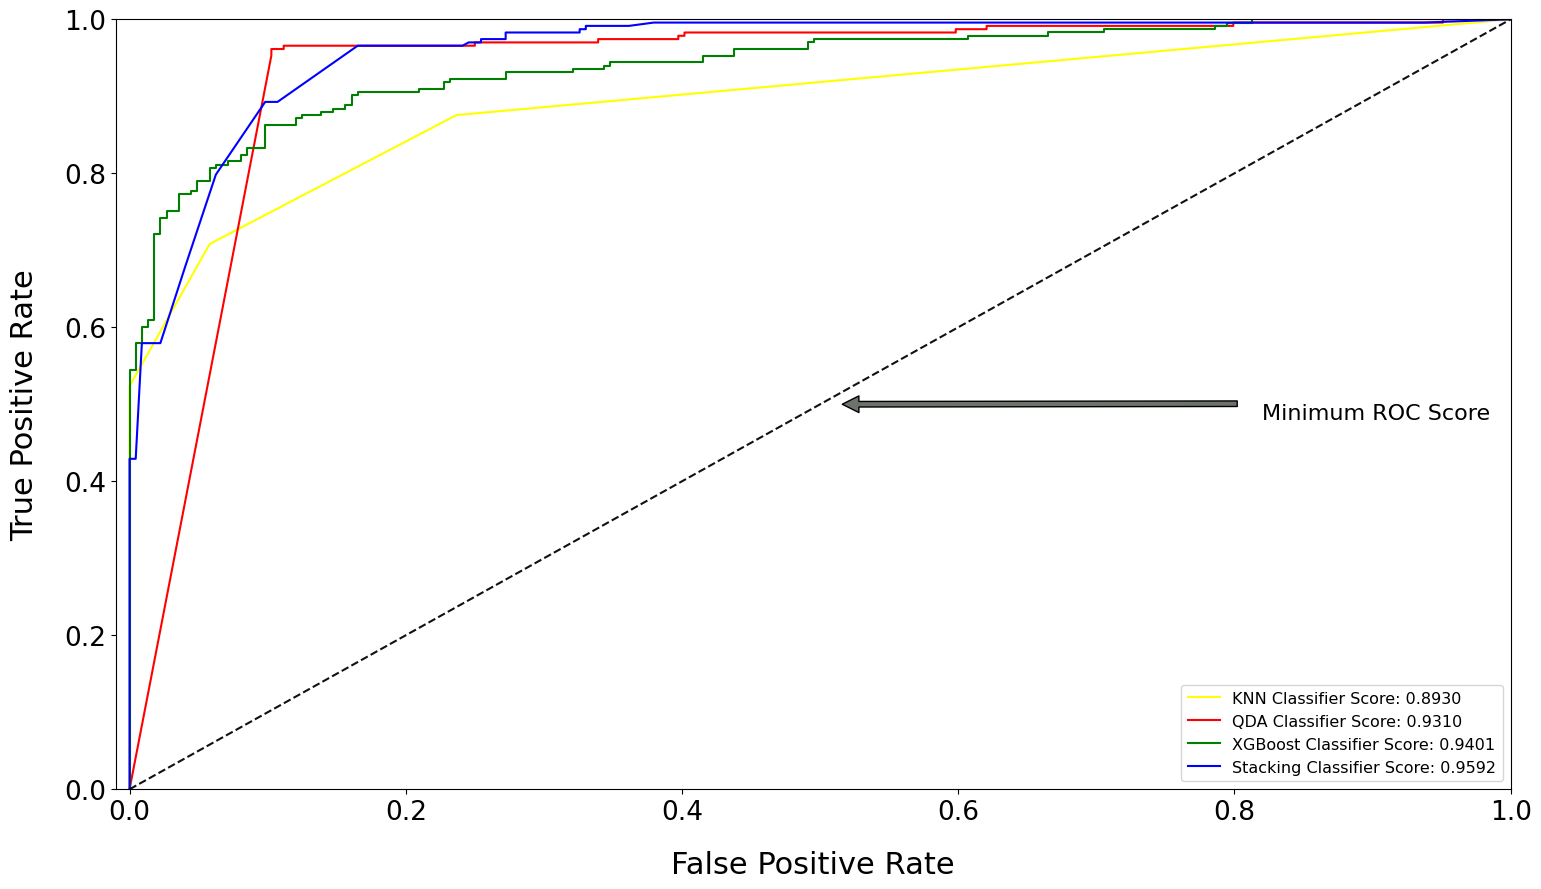

In [ ]:
knn_fpr, knn_tpr, knn_thresholds= roc_curve(y_a,knn_y_proba)
qda_fpr, qda_tpr, qda_threshold = roc_curve(y_a,qda_y_proba)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_a,xgb_y_proba)
stacking_fpr, stacking_tpr, stacking_threshold = roc_curve(y_a,clf_y_proba)




def graph_roc_curve_multiple(knn_fpr, knn_tpr, qda_fpr, qda_tpr, xgb_fpr, xgb_tpr, stacking_fpr, stacking_tpr):


    plt.figure(figsize=(18,10))
    plt.style.use('default')
    #plt.title('ROC curve \n 7 algorithms', fontsize=18)
    plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y_a,knn_y_proba)),color='#FFFF00')
    plt.plot(qda_fpr, qda_tpr, label='QDA Classifier Score: {:.4f}'.format(roc_auc_score(y_a,qda_y_proba)),color='#FF0000')
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_a,xgb_y_proba)),color='#008000')
    plt.plot(stacking_fpr, stacking_tpr, label='Stacking Classifier Score: {:.4f}'.format(roc_auc_score(y_a,clf_y_proba)),color='#0000FF')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=22,labelpad=18)
    plt.ylabel('True Positive Rate', fontsize=22,labelpad=18)

    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)


    plt.annotate('Minimum ROC Score ', xy=(0.5, 0.5), xytext=(0.82, 0.48),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05), fontsize=16
                )
    plt.legend()

graph_roc_curve_multiple(knn_fpr, knn_tpr, qda_fpr, qda_tpr, xgb_fpr, xgb_tpr, stacking_fpr, stacking_tpr)
plt.grid(False)
plt.legend(loc='lower right', fontsize=11.5)
plt.show()

In [11]:
###SHAP值

import shap
explainer = shap.TreeExplainer(Xgbc)
shap_values = explainer.shap_values(X15)
if len(shap_values) == 2:
    shap_values = shap_values[1]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


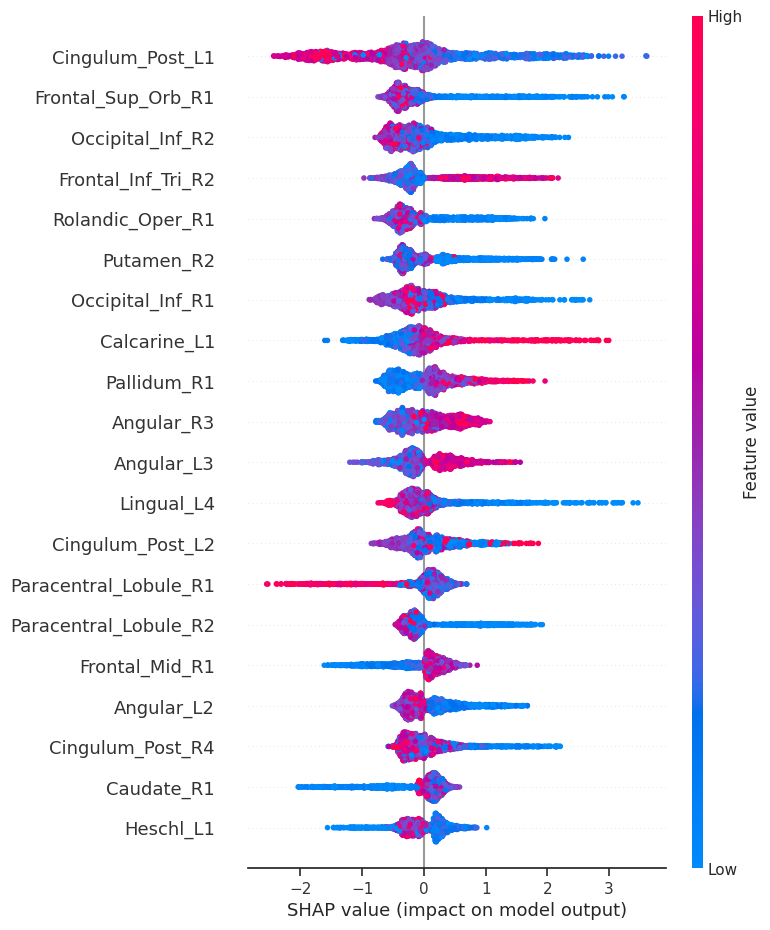

In [ ]:
shap.summary_plot(shap_values, X15,show=False)
# plt.savefig('summary_plot.svg',bbox_inches='tight',dpi=900)

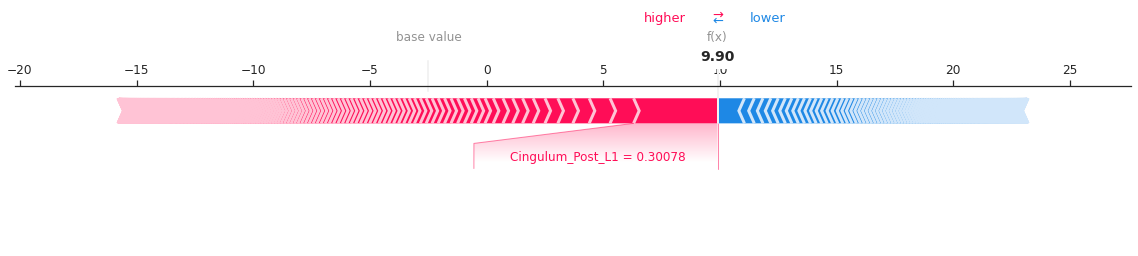

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[7], X15.iloc[7,:],matplotlib=True,show=False)
# plt.savefig('shap1.svg') #,bbox_inches='tight',dpi=500

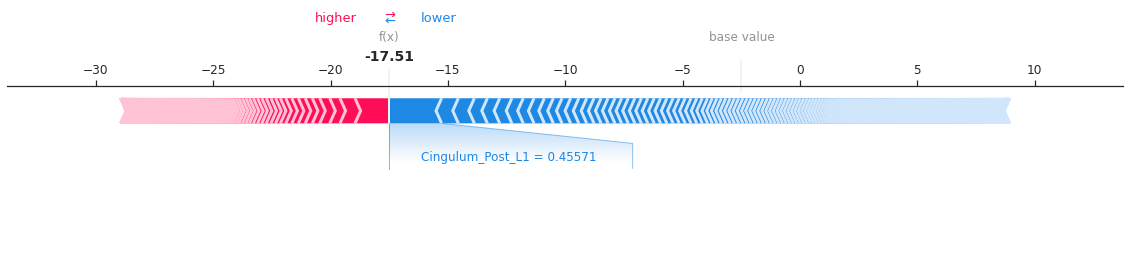

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[1160], X15.iloc[1160,:],matplotlib=True,show=False)
# plt.savefig('shap0.svg',bbox_inches='tight',dpi=500)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


PearsonRResult(statistic=-0.6514767153727393, pvalue=3.6939268205156444e-276)

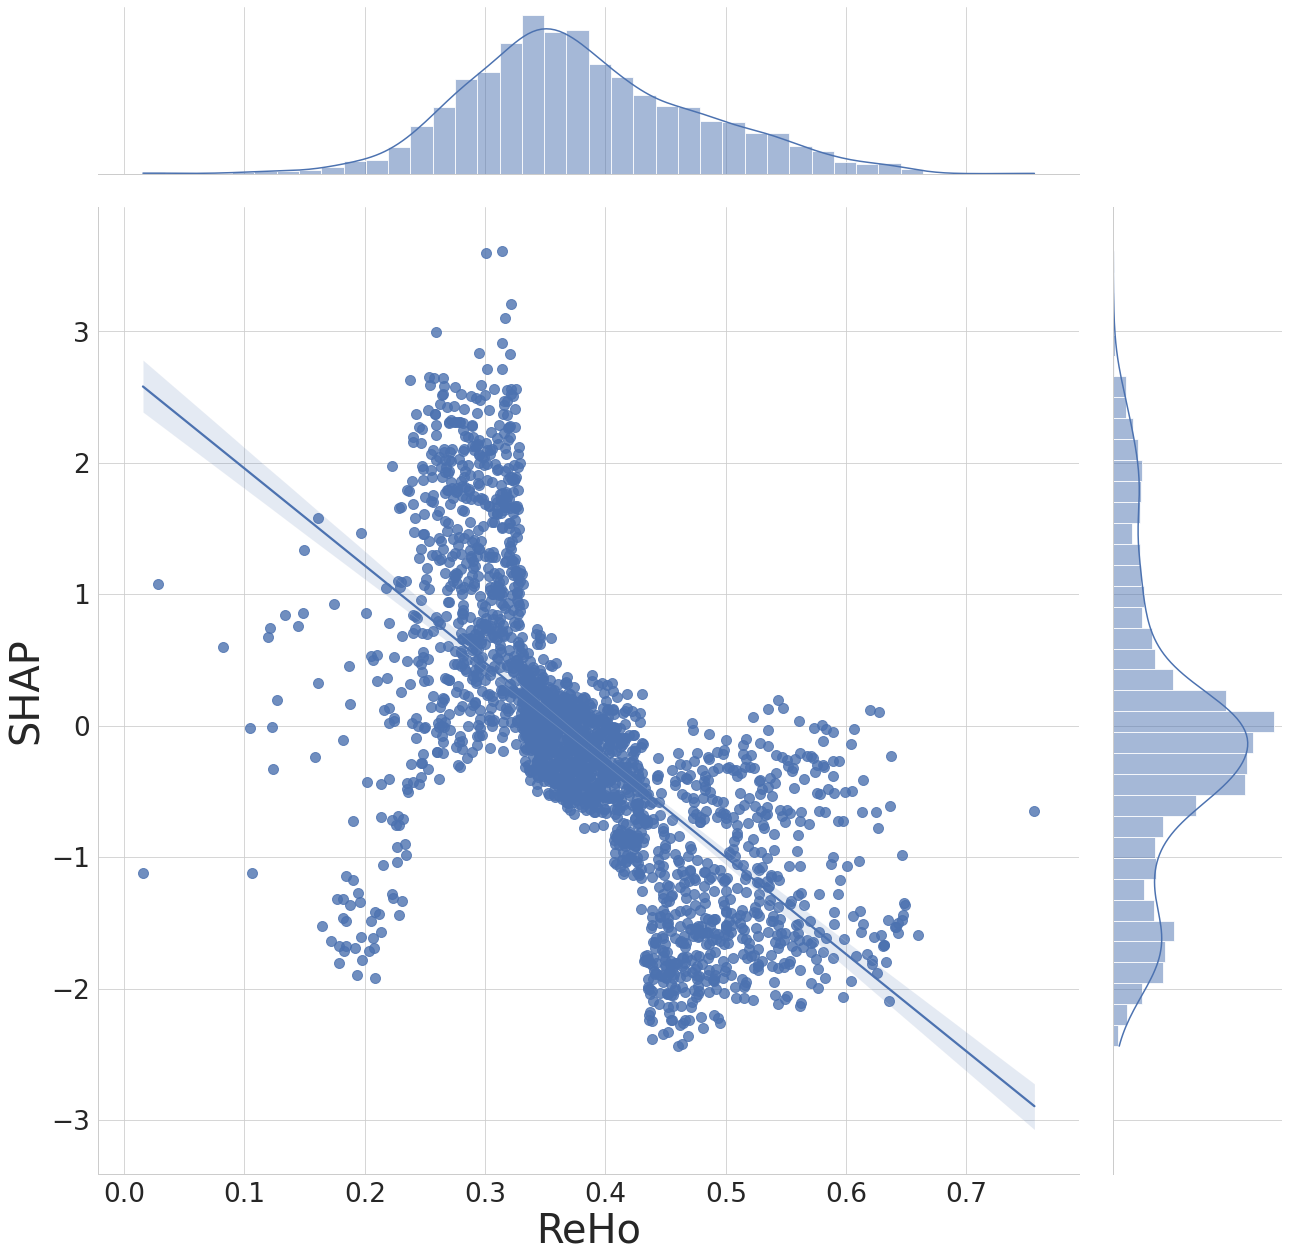

In [ ]:
import scipy.stats as sci

#sns.set(font_scale = 1.5)
sns.set(style='whitegrid')
sns.set_context("paper",font_scale=3, rc={"lines.linewidth": 1.5})
#y_test = np.array(y_test)
g = sns.jointplot(X15['Cingulum_Post_L1'], shap_values[:, 34], kind="reg",scatter_kws={'s': 100}, color="b",height = 18) #xlim=(10, 85), ylim=(0, 85)
g.set_axis_labels('ReHo', 'SHAP', fontsize=40)
plt.savefig('Corr_Cingulum_Post_L1.svg',bbox_inches='tight')
sci.pearsonr(X15['Cingulum_Post_L1'], shap_values[:, 34])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


PearsonRResult(statistic=0.7228147100117696, pvalue=0.0)

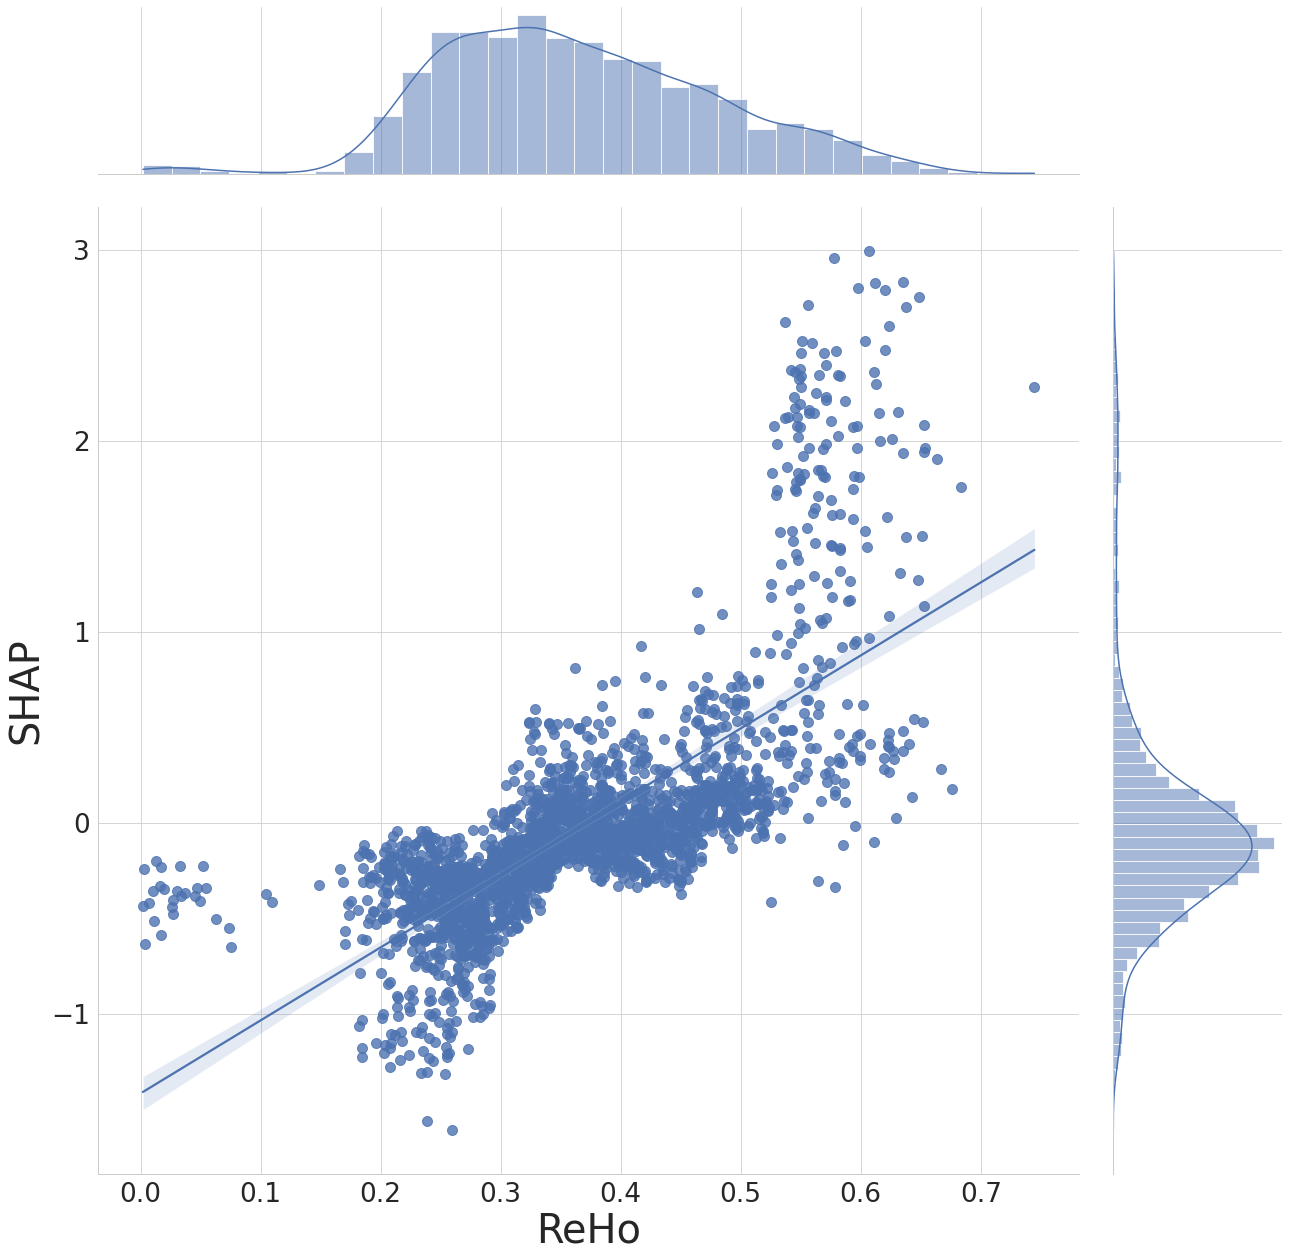

In [ ]:
import scipy.stats as sci

#sns.set(font_scale = 1.5)
sns.set(style='whitegrid')
sns.set_context("paper",font_scale=3, rc={"lines.linewidth": 1.5})
#y_test = np.array(y_test)
g = sns.jointplot(X15['Calcarine_L1'], shap_values[:, 42], kind="reg", scatter_kws={'s': 100},color="b",height = 18) #xlim=(10, 85), ylim=(0, 85)
g.set_axis_labels('ReHo', 'SHAP', fontsize=40)
plt.savefig('Corr_Calcarine_L1.svg',bbox_inches='tight')
sci.pearsonr(X15['Calcarine_L1'], shap_values[:, 42])